### Install the package

In [2]:
!pip install dataretrieval --quiet


In [40]:
from dataretrieval import nwis
from IPython.display import display
from matplotlib import ticker
import pandas as pd

### Get site information

In [4]:
# Specify the region you want to retrieve information for
GSLsites = nwis.what_sites(huc="16010204", outputDataTypeCd='dv', startDT='1990-10-01', endDT='2022-10-01', parameterCd="00060")

# Display the data frame as a table
display(GSLsites[0])

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,alt_acy_va,...,stat_cd,ts_id,loc_web_ds,medium_grp_cd,parm_grp_cd,srs_id,access_cd,begin_date,end_date,count_nu
0,USGS,10117000,"HAMMOND (EAST SIDE) CANAL NEAR COLLINSTON, UT",ST-CA,41.830760,-112.057452,F,NAD83,NaN,NaN,...,3,143462,NaN,wat,NaN,1645423,0,1912-06-01,2006-09-29,26733
1,USGS,10117500,"WEST SIDE CANAL NEAR COLLINSTON, UT",ST-CA,41.831871,-112.060785,F,NAD83,NaN,NaN,...,3,295852,NaN,wat,NaN,1645423,0,1912-06-01,2006-09-29,31639
2,USGS,10118000,"BEAR RIVER NEAR COLLINSTON, UT",ST,41.834093,-112.055230,F,NAD83,4276.13,20.00,...,3,143466,NaN,wat,NaN,1645423,0,1902-10-01,2006-09-29,37712
3,USGS,10118000,"BEAR RIVER NEAR COLLINSTON, UT",ST,41.834093,-112.055230,F,NAD83,4276.13,20.00,...,3,143467,NaN,wat,NaN,17164666,0,1986-10-01,1996-09-29,3652
4,USGS,10118000,"BEAR RIVER NEAR COLLINSTON, UT",ST,41.834093,-112.055230,F,NAD83,4276.13,20.00,...,3,143468,NaN,wat,NaN,17164591,0,1986-10-01,1996-09-29,3652
5,USGS,10125500,MALAD RIVER AT WOODRUFF ID,ST,42.029722,-112.229583,S,NAD83,4366.79,0.12,...,3,44931,[(2)],wat,NaN,1645423,0,1938-11-19,1982-09-29,16021
6,USGS,10125500,MALAD RIVER AT WOODRUFF ID,ST,42.029722,-112.229583,S,NAD83,4366.79,0.12,...,3,312383,NaN,wat,NaN,1645423,0,2022-03-24,2023-08-04,499
7,USGS,10126000,"BEAR RIVER NEAR CORINNE, UT",ST,41.576321,-112.100782,F,NAD83,4206.78,0.16,...,1,241134,NaN,wat,NaN,1645597,0,1981-10-01,2023-08-03,1394
8,USGS,10126000,"BEAR RIVER NEAR CORINNE, UT",ST,41.576321,-112.100782,F,NAD83,4206.78,0.16,...,2,241135,NaN,wat,NaN,1645597,0,1981-10-01,2023-08-03,1394
9,USGS,10126000,"BEAR RIVER NEAR CORINNE, UT",ST,41.576321,-112.100782,F,NAD83,4206.78,0.16,...,3,240650,NaN,wat,NaN,1645597,0,1981-10-01,2023-08-03,1386


In [56]:
GSLsites[0][GSLsites[0]['site_no']=='10010020'][['dec_lat_va','dec_long_va']]

,dec_lat_va,dec_long_va
0,41.22243,-112.849978


### Get all of the annual mean discharge data for a single site

In [5]:
# Set the parameters needed to retrieve data
siteNumber = "10126000"
parameterCode = "00060" # Discharge

# Retrieve the statistics
x1 = nwis.get_stats(sites=siteNumber, parameterCd=parameterCode, statReportType="annual")
print("Retrieved " + str(len(x1[0])) + " data values.")

Retrieved 66 data values.


In [6]:
# Display the data frame as a table
display(x1[0])

,agency_cd,site_no,parameter_cd,ts_id,loc_web_ds,year_nu,mean_va,count_nu
0,USGS,10126000,00060,143472,NaN,1950,2705.0,365
1,USGS,10126000,00060,143472,NaN,1951,2381.0,365
2,USGS,10126000,00060,143472,NaN,1952,2364.0,366
3,USGS,10126000,00060,143472,NaN,1953,1297.0,365
4,USGS,10126000,00060,143472,NaN,1954,807.5,365
...,...,...,...,...,...,...,...,...
61,USGS,10126000,00060,143472,NaN,2018,1147.0,365
62,USGS,10126000,00060,143472,NaN,2019,1439.0,365
63,USGS,10126000,00060,143472,NaN,2020,1107.0,366
64,USGS,10126000,00060,143472,NaN,2021,575.4,365


Text(0, 0.5, 'Annual mean discharge (cfs)')

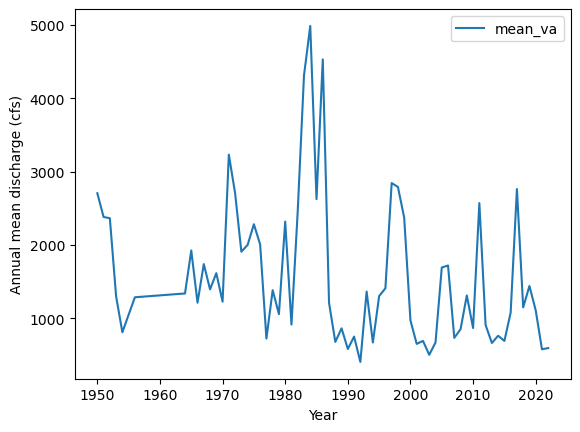

In [9]:
ax = x1[0].plot(x='year_nu', y='mean_va')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.set_xlabel('Year')
ax.set_ylabel('Annual mean discharge (cfs)')

In [13]:
# Set the parameters needed to retrieve data
siteNumber = "10126000" 
parameterCode = "00060" # Discharge
startDate = "1990-10-01"
endDate = "2022-09-30"

# Retrieve the data
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 
print("Retrieved " + str(len(dailyStreamflow[0])) + " data values.")

Retrieved 11688 data values.


In [15]:
# Display the data frame as a table
display(dailyStreamflow[0])

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
1990-10-01 00:00:00+00:00,474.0,A,10126000
1990-10-02 00:00:00+00:00,459.0,A,10126000
1990-10-03 00:00:00+00:00,303.0,A,10126000
1990-10-04 00:00:00+00:00,392.0,A,10126000
1990-10-05 00:00:00+00:00,314.0,A,10126000
...,...,...,...
2022-09-26 00:00:00+00:00,138.0,A,10126000
2022-09-27 00:00:00+00:00,99.7,A,10126000
2022-09-28 00:00:00+00:00,142.0,A,10126000


In [14]:
dailyStreamflow[0].describe()

,00060_Mean
count,11688.000000
mean,1213.232272
std,1207.282382
min,23.000000
25%,307.000000
50%,900.000000
75%,1620.000000
max,9390.000000


Text(0, 0.5, 'Streamflow (cfs)')

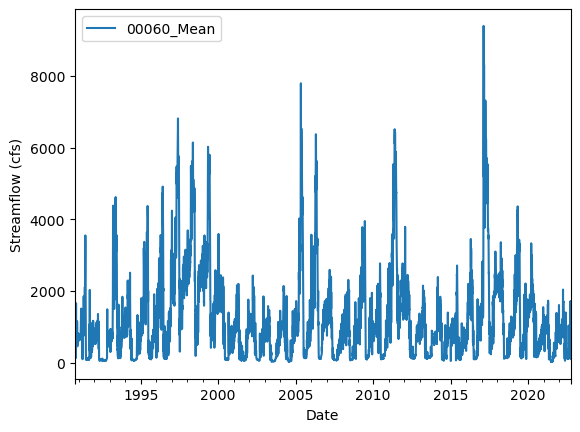

In [16]:
ax = dailyStreamflow[0].plot(y='00060_Mean')
ax.set_xlabel('Date')
ax.set_ylabel('Streamflow (cfs)')

In [38]:
# Specify the region you want to retrieve information for
GSLsites = nwis.what_sites(huc="16020102", outputDataTypeCd='dv', startDT='1990-10-01', endDT='2022-10-01', parameterCd="00060")

# Display the data frame as a table
display(set(GSLsites[0][pd.to_datetime(GSLsites[0]['end_date']).dt.year > 2021]['site_no']))

{'10133650',
 '10133800',
 '10133980',
 '10134500',
 '10136500',
 '10136600',
 '10137000',
 '10137500',
 '10140100',
 '10140700',
 '10141000',
 '10142000'}

In [39]:
# Specify the region you want to retrieve information for
GSLsites = nwis.what_sites(huc="16020204", outputDataTypeCd='dv', startDT='1990-10-01', endDT='2022-10-01', parameterCd="00060")

# Display the data frame as a table
display(set(GSLsites[0][pd.to_datetime(GSLsites[0]['end_date']).dt.year > 2021]['site_no']))

{'10168000', '10170490', '10170500', '10171000', '10172200', '10172630'}

In [41]:
# Specify the region you want to retrieve information for
GSLsites = nwis.what_sites(huc="16020310", outputDataTypeCd='dv', startDT='1990-10-01', endDT='2022-10-01', parameterCd="00060")

# Display the data frame as a table
display(set(GSLsites[0][pd.to_datetime(GSLsites[0]['end_date']).dt.year > 2021]['site_no']))

{'10010020', '10010025', '10010026', '410401112134801'}